In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Asso
import pandas as pd

### Generate Boolean matrix

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


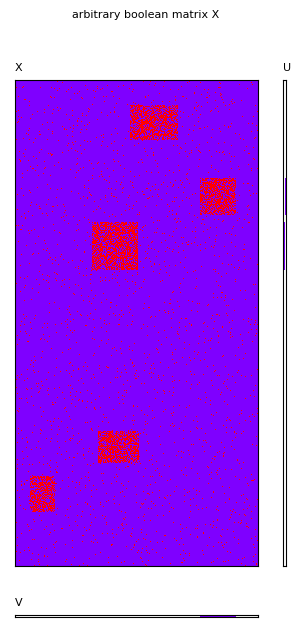

In [2]:
# generate arbitrary Boolean matrix (X)

from generators import BlockDiagonalMatrixGenerator, BlockMatrixGenerator

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = BlockMatrixGenerator(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

## II. Prediction task with Ratio Split

In [3]:
from datasets import RatioSplit

X_split = RatioSplit(X=X.X, test_size=0.2, val_size=0.2, seed=1997)
# negative sampling the same number of positive samples
X_split.negative_sample(train_size=X_split.pos_train_size, 
                        val_size=X_split.pos_val_size, 
                        test_size=X_split.pos_test_size, 
                        seed=2023, type='popularity')
X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 16877
[I]   val_size     : 5626
[I]   test_size    : 5626
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 471871
[I]   n_negatives  : 28129
[I]   train_size   : 16877
[I]   val_size     : 5626
[I]   test_size    : 5626
[I]   seed         : 2023


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### 1. Manually select tau
k and w are not effective here.

[I] k            : 5
[I] verbose      : False
[I] display      : False
[I] tau          : 0.1
[I] weights      : 0.2
[I] task         : reconstruction
[I] verbose      : True
[I] display      : True
[I] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_compressed.py:291: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


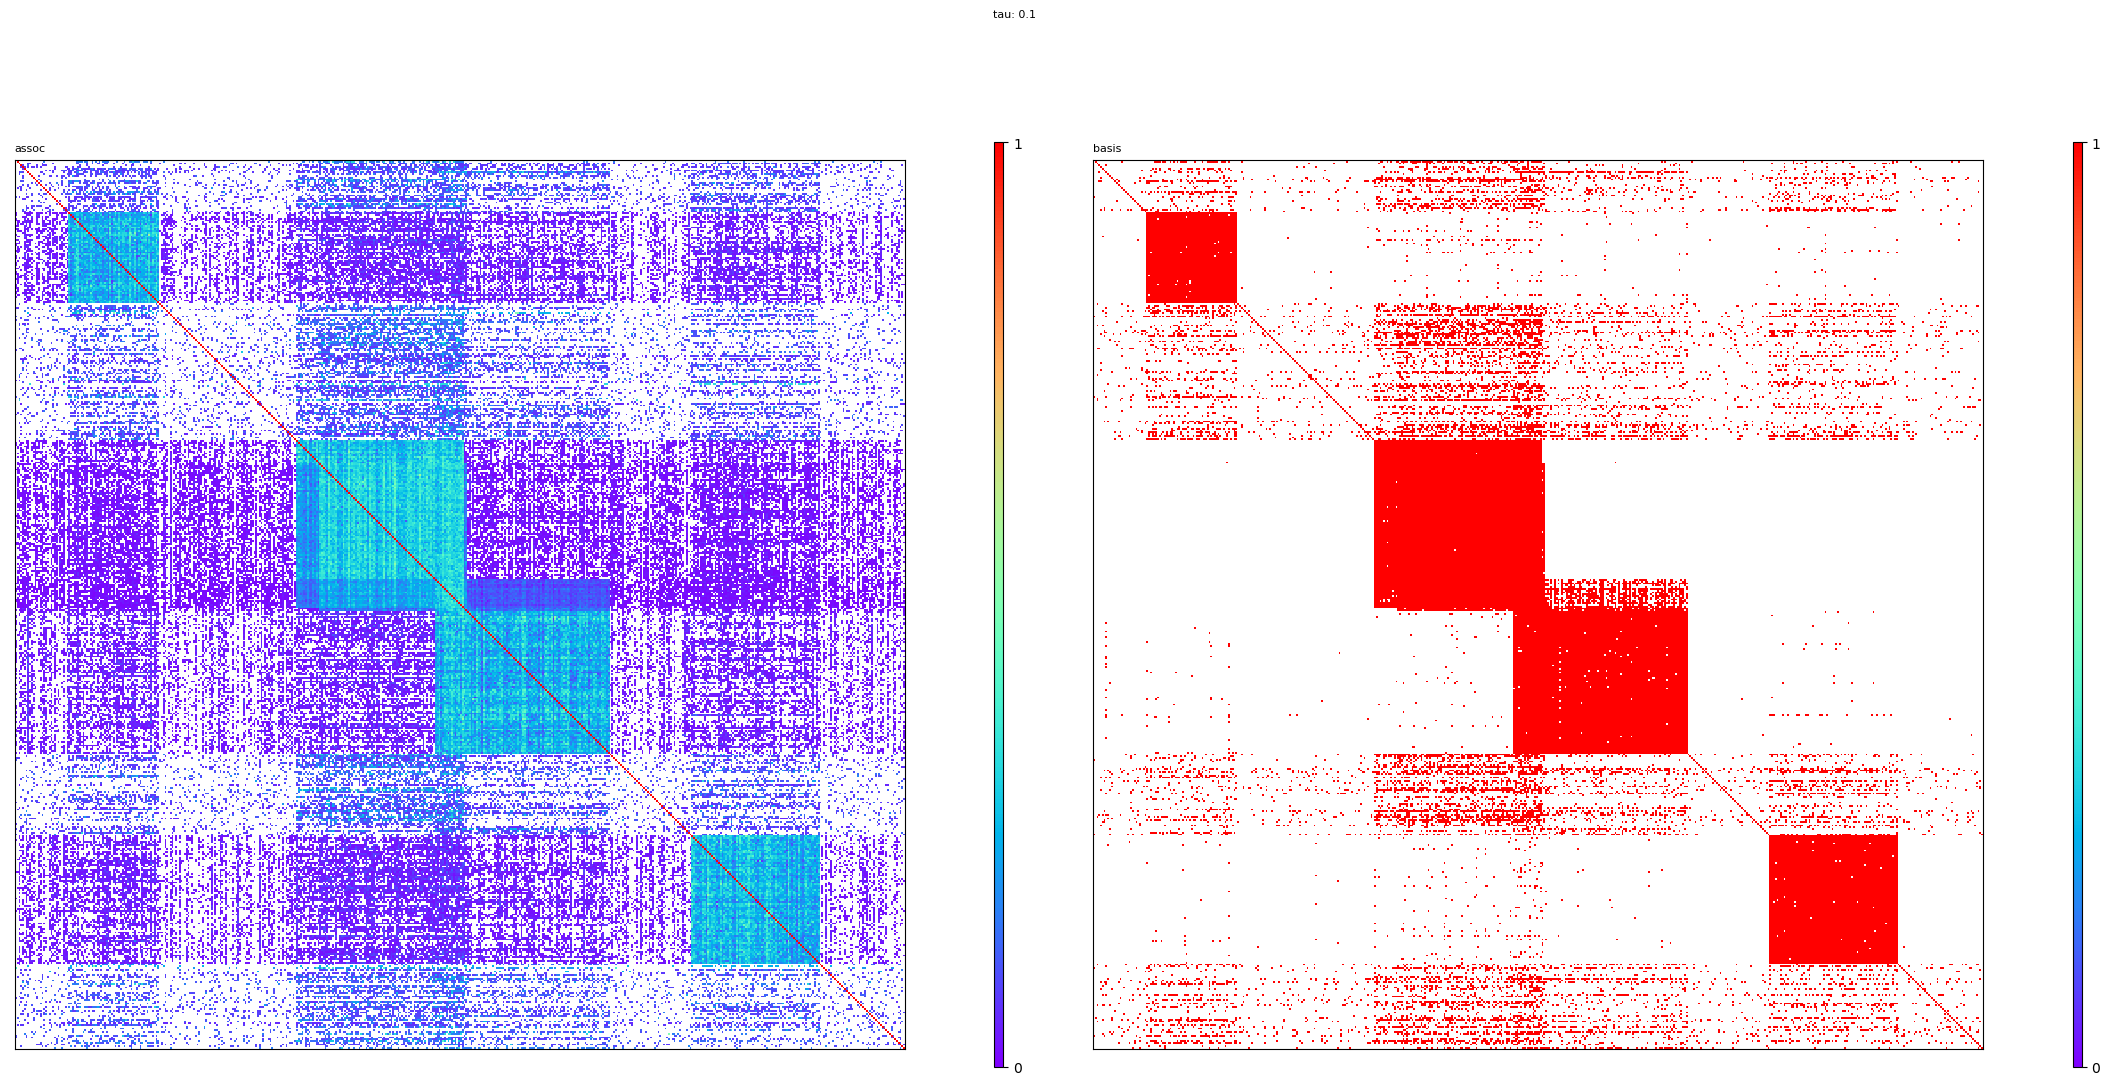

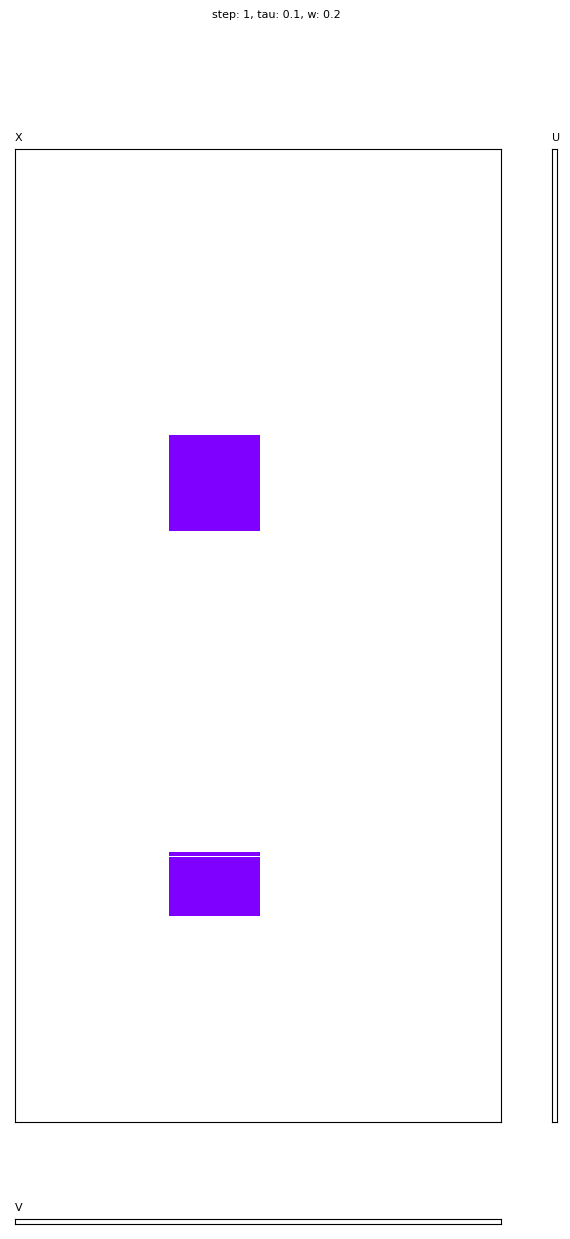

,time,cover_score,Recall,Precision,Accuracy,F1
0,21/02/24 01:45:03,2247.6,0.314748,0.346691,0.95685,0.329948


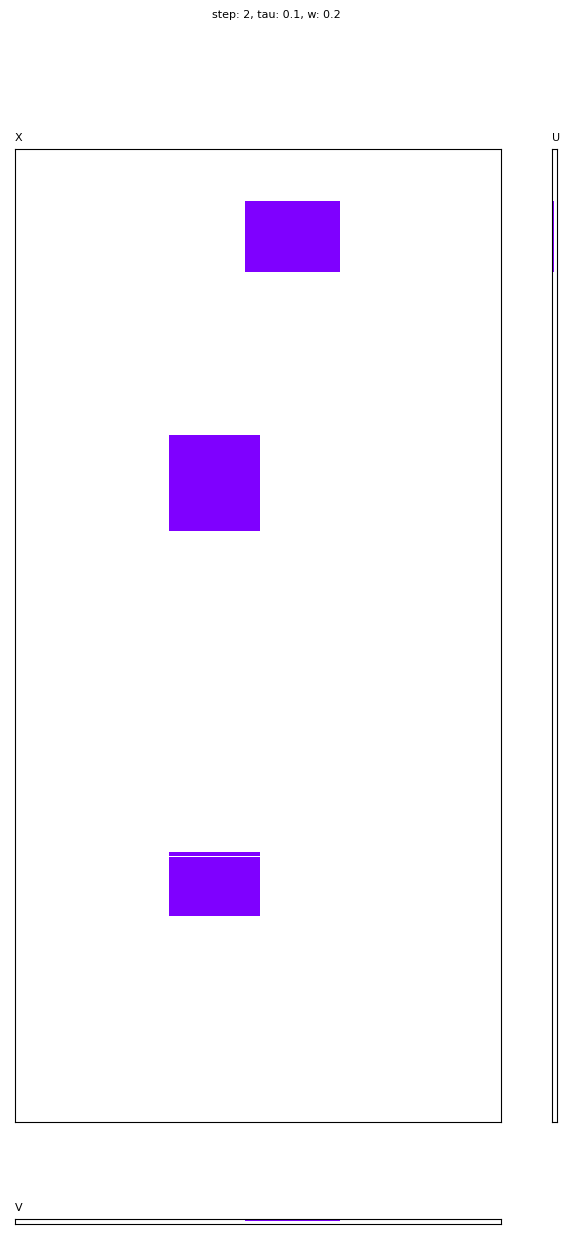

,time,cover_score,Recall,Precision,Accuracy,F1
0,21/02/24 01:45:03,2247.6,0.314748,0.346691,0.956850,0.329948
1,21/02/24 01:45:07,3379.8,0.466611,0.350374,0.952794,0.400224


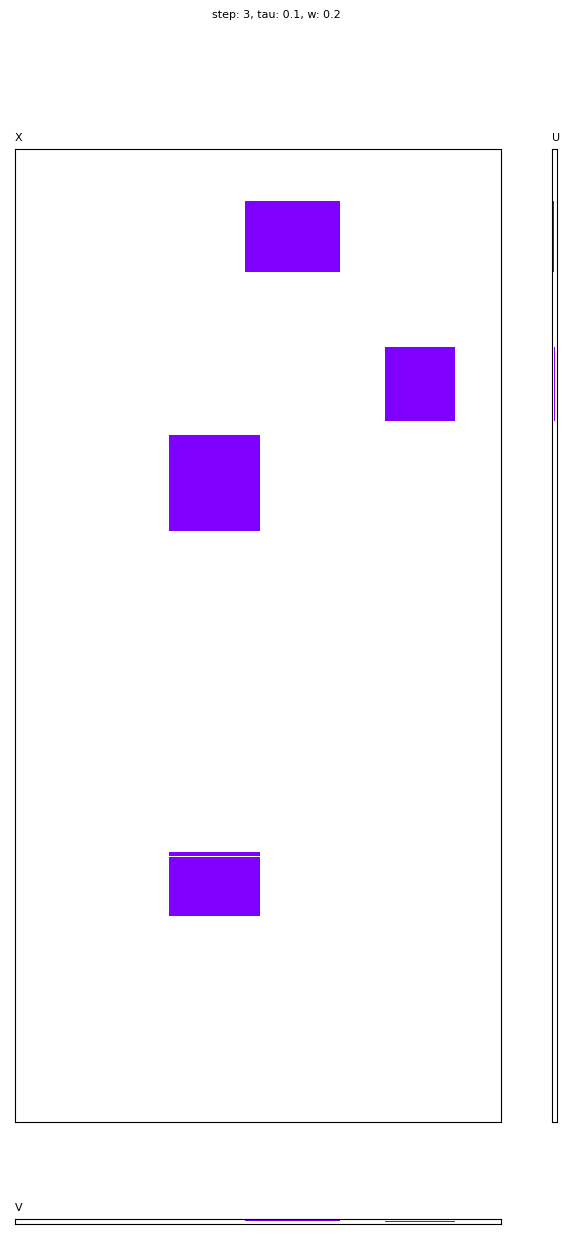

,time,cover_score,Recall,Precision,Accuracy,F1
0,21/02/24 01:45:03,2247.6,0.314748,0.346691,0.956850,0.329948
1,21/02/24 01:45:07,3379.8,0.466611,0.350374,0.952794,0.400224
2,21/02/24 01:45:11,4283.4,0.584997,0.353263,0.949842,0.440513


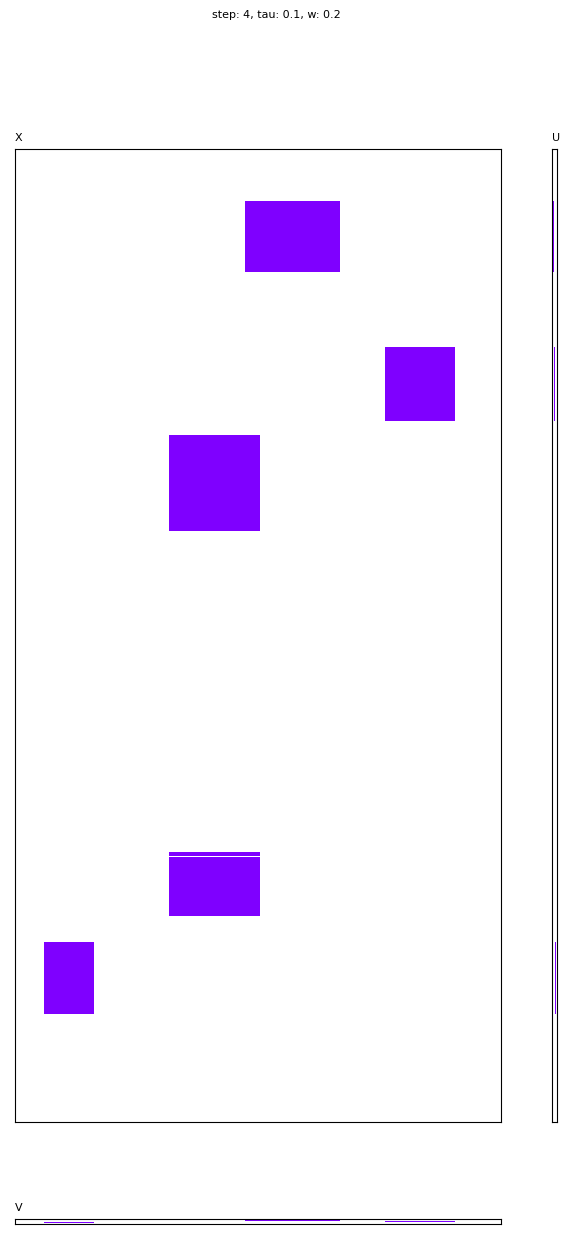

,time,cover_score,Recall,Precision,Accuracy,F1
0,21/02/24 01:45:03,2247.6,0.314748,0.346691,0.956850,0.329948
1,21/02/24 01:45:07,3379.8,0.466611,0.350374,0.952794,0.400224
2,21/02/24 01:45:11,4283.4,0.584997,0.353263,0.949842,0.440513
3,21/02/24 01:45:15,4879.6,0.665047,0.353824,0.947698,0.461903


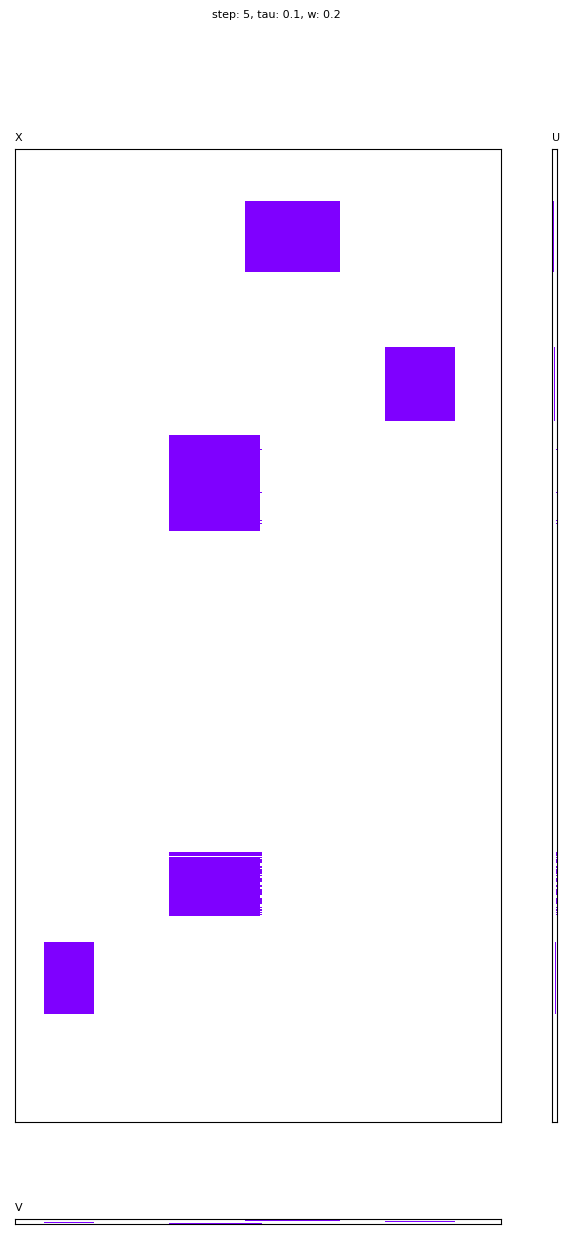

,time,cover_score,Recall,Precision,Accuracy,F1
0,21/02/24 01:45:03,2247.6,0.314748,0.346691,0.956850,0.329948
1,21/02/24 01:45:07,3379.8,0.466611,0.350374,0.952794,0.400224
2,21/02/24 01:45:11,4283.4,0.584997,0.353263,0.949842,0.440513
3,21/02/24 01:45:15,4879.6,0.665047,0.353824,0.947698,0.461903
4,21/02/24 01:45:20,4915.6,0.668247,0.354520,0.947734,0.463267


100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


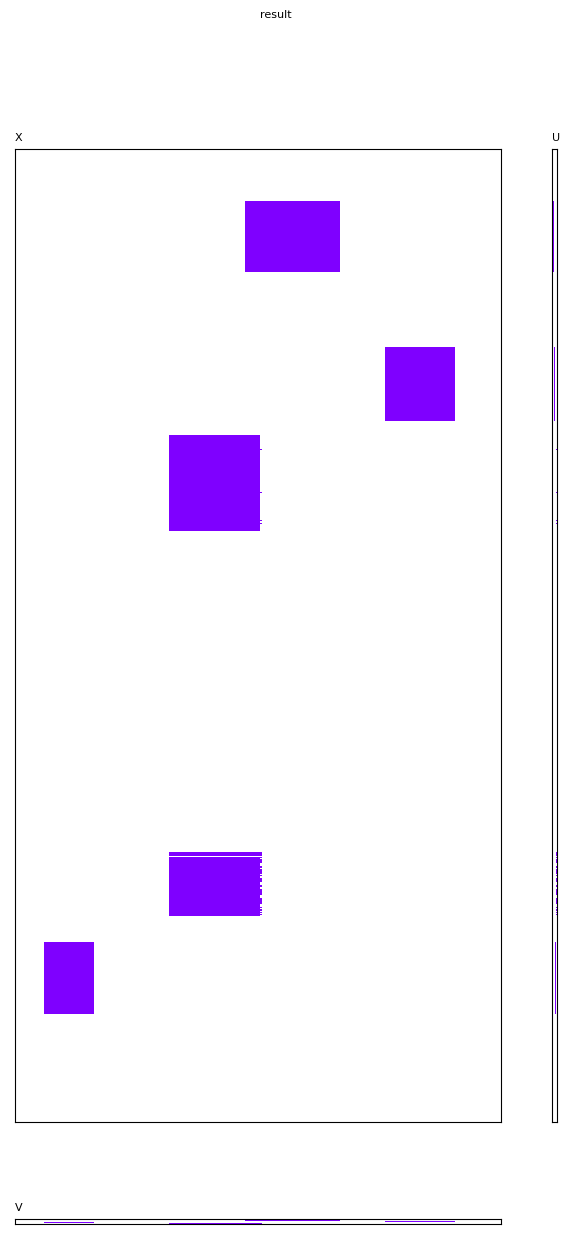

In [17]:
k = 5
tau_list = [0.10, 0.15, 0.20, 0.25]
w = 0.2

tau = 0.10

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train, task='reconstruction', display=True, verbose=True)

In [10]:
asso.X_train.max()

1

In [26]:
asso.X_train

<1000x500 sparse matrix of type '<class 'numpy.intc'>'
	with 33754 stored elements in Compressed Sparse Row format>

In [22]:
asso.logs['train_results']

,time,cover_score,Recall,Precision,Accuracy,F1
0,21/02/24 08:12:49,2247.6,0.314748,0.346691,0.956850,0.329948
1,21/02/24 08:12:54,3379.8,0.466611,0.350374,0.952794,0.400224
2,21/02/24 08:12:58,4283.4,0.584997,0.353263,0.949842,0.440513
3,21/02/24 08:13:02,4879.6,0.665047,0.353824,0.947698,0.461903
4,21/02/24 08:13:06,4915.6,0.668247,0.354520,0.947734,0.463267


In [14]:
asso.logs['train_results']

,time,cover_score,Recall,Precision,Accuracy,F1
0,21/02/24 07:28:29,2247.6,0.314748,0.346691,0.956850,0.329948
1,21/02/24 07:28:33,3379.8,0.466611,0.350374,0.952794,0.400224
2,21/02/24 07:28:37,4283.4,0.584997,0.353263,0.949842,0.440513
3,21/02/24 07:28:41,4879.6,0.665047,0.353824,0.947698,0.461903
4,21/02/24 07:28:46,4915.6,0.668247,0.354520,0.947734,0.463267


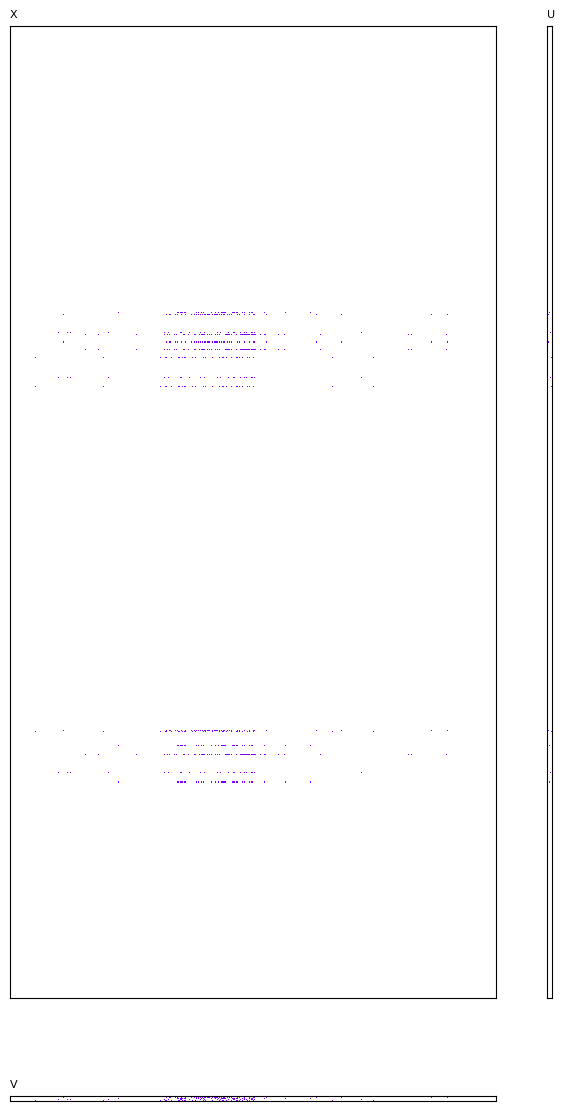

In [17]:
asso.display = True
asso.show_matrix()

### 2. Grid search for w
Use some small k and selected tau for trials.

In [ ]:
k = 5
tau = 0.15
w_list = [[0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]

# empty table
from utils import add_log

metrics = ['Recall', 'Precision', 'Error', 'Accuracy', 'F1']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
df_prediction = pd.DataFrame(columns=columns)
df_reconstruction = pd.DataFrame(columns=columns)

[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.7, 0.3]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:25<00:00,  5.16s/it]                         


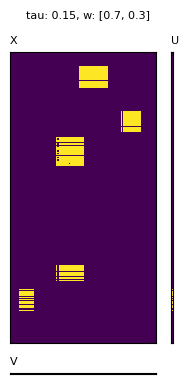

[I] task         : prediction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-08 04:33:08.624117,5,0.10,0.7,0.3,0.537682,0.863792,0.273551,0.726449,0.662796
1,2023-12-08 04:33:41.854235,5,0.10,0.8,0.2,0.667970,0.866897,0.217295,0.782705,0.754543
2,2023-12-08 04:34:18.579873,5,0.10,0.9,0.1,0.681123,0.754776,0.270085,0.729915,0.716061
3,2023-12-08 04:35:14.018528,5,0.15,0.7,0.3,0.540348,0.865604,0.271774,0.728226,0.665353


[I] task         : reconstruction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-08 04:33:08.716318,5,0.10,0.7,0.3,0.537682,0.115643,0.051468,0.948532,0.190347
1,2023-12-08 04:33:41.948842,5,0.10,0.8,0.2,0.667970,0.118132,0.059844,0.940156,0.200759
2,2023-12-08 04:34:18.680380,5,0.10,0.9,0.1,0.681123,0.077598,0.094690,0.905310,0.139323
3,2023-12-08 04:35:14.110055,5,0.15,0.7,0.3,0.540348,0.116377,0.051336,0.948664,0.191508


[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.8, 0.2]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:25<00:00,  5.19s/it]                         


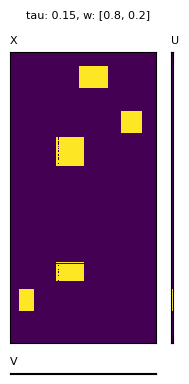

[I] task         : prediction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-08 04:33:08.624117,5,0.10,0.7,0.3,0.537682,0.863792,0.273551,0.726449,0.662796
1,2023-12-08 04:33:41.854235,5,0.10,0.8,0.2,0.667970,0.866897,0.217295,0.782705,0.754543
2,2023-12-08 04:34:18.579873,5,0.10,0.9,0.1,0.681123,0.754776,0.270085,0.729915,0.716061
3,2023-12-08 04:35:14.018528,5,0.15,0.7,0.3,0.540348,0.865604,0.271774,0.728226,0.665353
4,2023-12-08 04:35:44.844896,5,0.15,0.8,0.2,0.664593,0.866914,0.218717,0.781283,0.752390


[I] task         : reconstruction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-08 04:33:08.716318,5,0.10,0.7,0.3,0.537682,0.115643,0.051468,0.948532,0.190347
1,2023-12-08 04:33:41.948842,5,0.10,0.8,0.2,0.667970,0.118132,0.059844,0.940156,0.200759
2,2023-12-08 04:34:18.680380,5,0.10,0.9,0.1,0.681123,0.077598,0.094690,0.905310,0.139323
3,2023-12-08 04:35:14.110055,5,0.15,0.7,0.3,0.540348,0.116377,0.051336,0.948664,0.191508
4,2023-12-08 04:35:44.942391,5,0.15,0.8,0.2,0.664593,0.117638,0.059864,0.940136,0.199893


[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.9, 0.1]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:26<00:00,  5.40s/it]                         


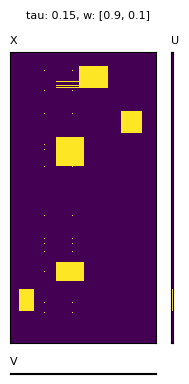

[I] task         : prediction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
1,2023-12-08 04:33:41.854235,5,0.10,0.8,0.2,0.667970,0.866897,0.217295,0.782705,0.754543
2,2023-12-08 04:34:18.579873,5,0.10,0.9,0.1,0.681123,0.754776,0.270085,0.729915,0.716061
3,2023-12-08 04:35:14.018528,5,0.15,0.7,0.3,0.540348,0.865604,0.271774,0.728226,0.665353
4,2023-12-08 04:35:44.844896,5,0.15,0.8,0.2,0.664593,0.866914,0.218717,0.781283,0.752390
5,2023-12-08 04:36:16.752115,5,0.15,0.9,0.1,0.673836,0.855370,0.220050,0.779950,0.753828


[I] task         : reconstruction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
1,2023-12-08 04:33:41.948842,5,0.10,0.8,0.2,0.667970,0.118132,0.059844,0.940156,0.200759
2,2023-12-08 04:34:18.680380,5,0.10,0.9,0.1,0.681123,0.077598,0.094690,0.905310,0.139323
3,2023-12-08 04:35:14.110055,5,0.15,0.7,0.3,0.540348,0.116377,0.051336,0.948664,0.191508
4,2023-12-08 04:35:44.942391,5,0.15,0.8,0.2,0.664593,0.117638,0.059864,0.940136,0.199893
5,2023-12-08 04:36:16.856606,5,0.15,0.9,0.1,0.673836,0.113772,0.062730,0.937270,0.194675


In [ ]:
for w in w_list:
    asso = Asso(k=k, tau=tau, w=w)
    asso.fit(X_train, verbose=False, display=True, scaling=0.3)

    results = asso.eval(X_test, metrics=metrics, task='prediction')
    add_log(df_prediction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results, verbose=True)

    # to see the difference of 'prediction' and 'reconstruction'
    # here 'reconstruction' takes all 0's as negative samples
    results = asso.eval(X_test, metrics=metrics, task='reconstruction')
    add_log(df_reconstruction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results, verbose=True)

### 3. Get k
Given tau and w.

In [ ]:
k = 10 # more than ground truth k
tau = 0.15
w = [0.8, 0.2]

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='prediction', display=True, scaling=0.3) # load X_val to activate per-step eval

display(asso.df_validation)

[I] k            : 10
[I] tau          : 0.15
[I] weights      : [0.8, 0.2]
[I] task         : prediction
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 10/10 [01:36<00:00,  9.61s/it]                        


,time,k,tau,p_pos,p_neg,Recall,Precsion,Accuracy,F1
0,2023-12-08 04:36:58.780153,1,0.15,0.8,0.2,0.314611,0.835694,0.626378,0.457128
1,2023-12-08 04:37:08.141937,2,0.15,0.8,0.2,0.468539,0.850323,0.693032,0.604171
2,2023-12-08 04:37:17.842148,3,0.15,0.8,0.2,0.577320,0.858805,0.741202,0.690476
3,2023-12-08 04:37:27.452041,4,0.15,0.8,0.2,0.659794,0.865470,0.778617,0.748764
4,2023-12-08 04:37:37.187066,5,0.15,0.8,0.2,0.660860,0.864651,0.778706,0.749144
5,2023-12-08 04:37:46.899848,6,0.15,0.8,0.2,0.661038,0.864683,0.778795,0.749270
6,2023-12-08 04:37:56.679825,7,0.15,0.8,0.2,0.661038,0.864482,0.778706,0.749194
7,2023-12-08 04:38:06.445993,8,0.15,0.8,0.2,0.661038,0.864482,0.778706,0.749194
8,2023-12-08 04:38:16.186643,9,0.15,0.8,0.2,0.661038,0.864482,0.778706,0.749194
9,2023-12-08 04:38:25.961015,10,0.15,0.8,0.2,0.661038,0.864080,0.778528,0.749043


### 4. Reconstruct using given k, tau, w
With highest accuracy and F1 score.

In [ ]:
k = 5
tau = 0.15
w = [0.8, 0.2]

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train)

[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.8, 0.2]
[W] Missing validation data.


100%|██████████| 5/5 [00:26<00:00,  5.32s/it]                         


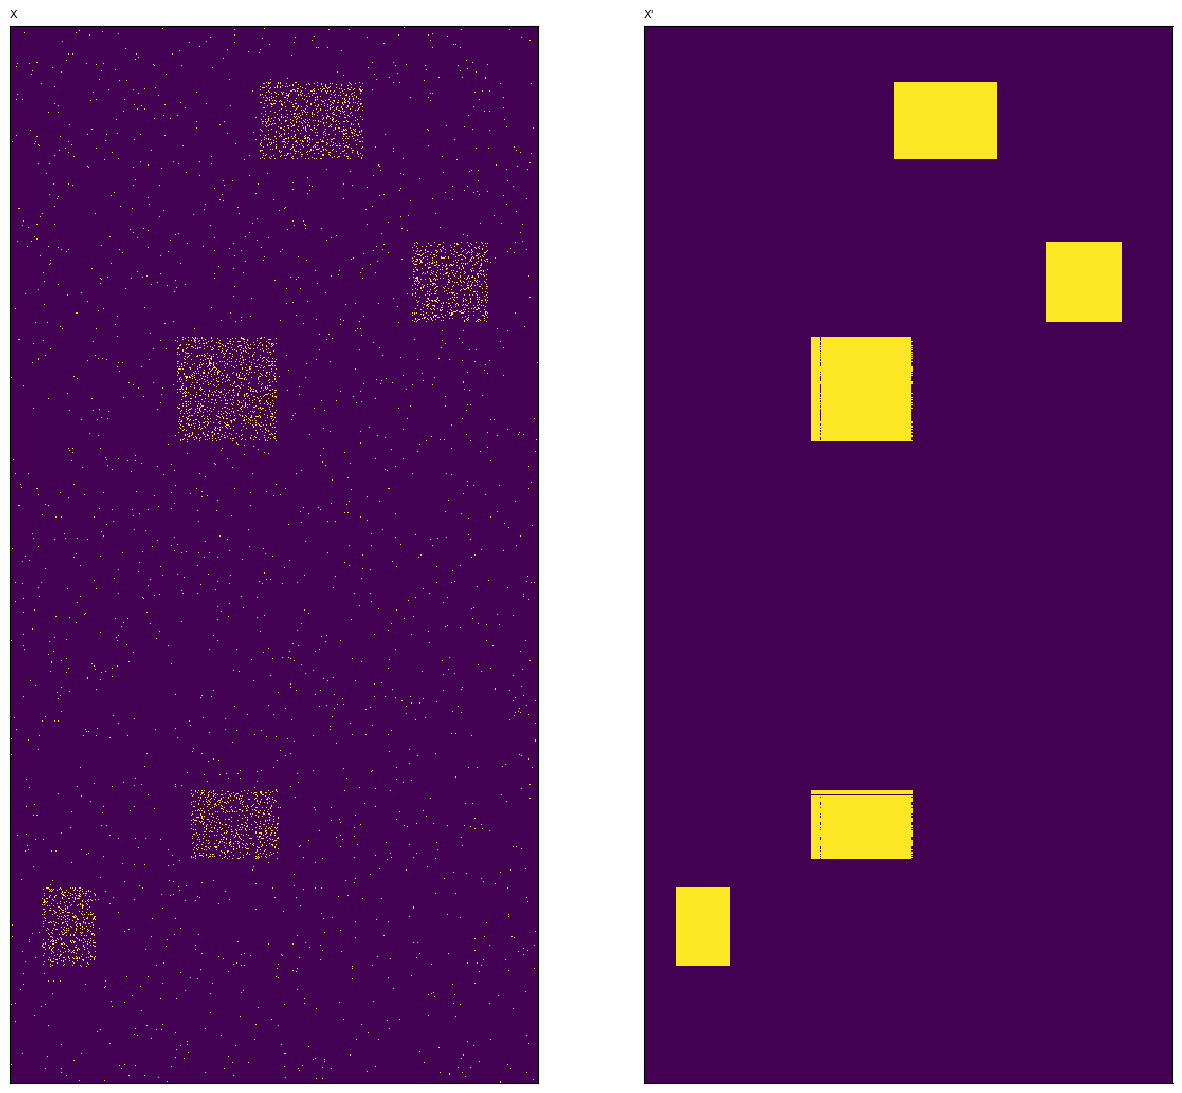

In [ ]:
from utils import matmul, to_dense, show_matrix
settings = [(to_dense(X_test), [0, 0], 'X'), 
            (matmul(asso.U, asso.V.T, sparse=False, boolean=True), [0, 1], "X'")]
show_matrix(settings=settings)

### 5. Overfitting
With extra k.

In [ ]:
k = 10
tau = 0.15
w = [0.8, 0.2]

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train)

[I] k            : 10
[I] tau          : 0.15
[I] weights      : [0.8, 0.2]
[W] Missing validation data.


100%|██████████| 10/10 [00:54<00:00,  5.48s/it]                        


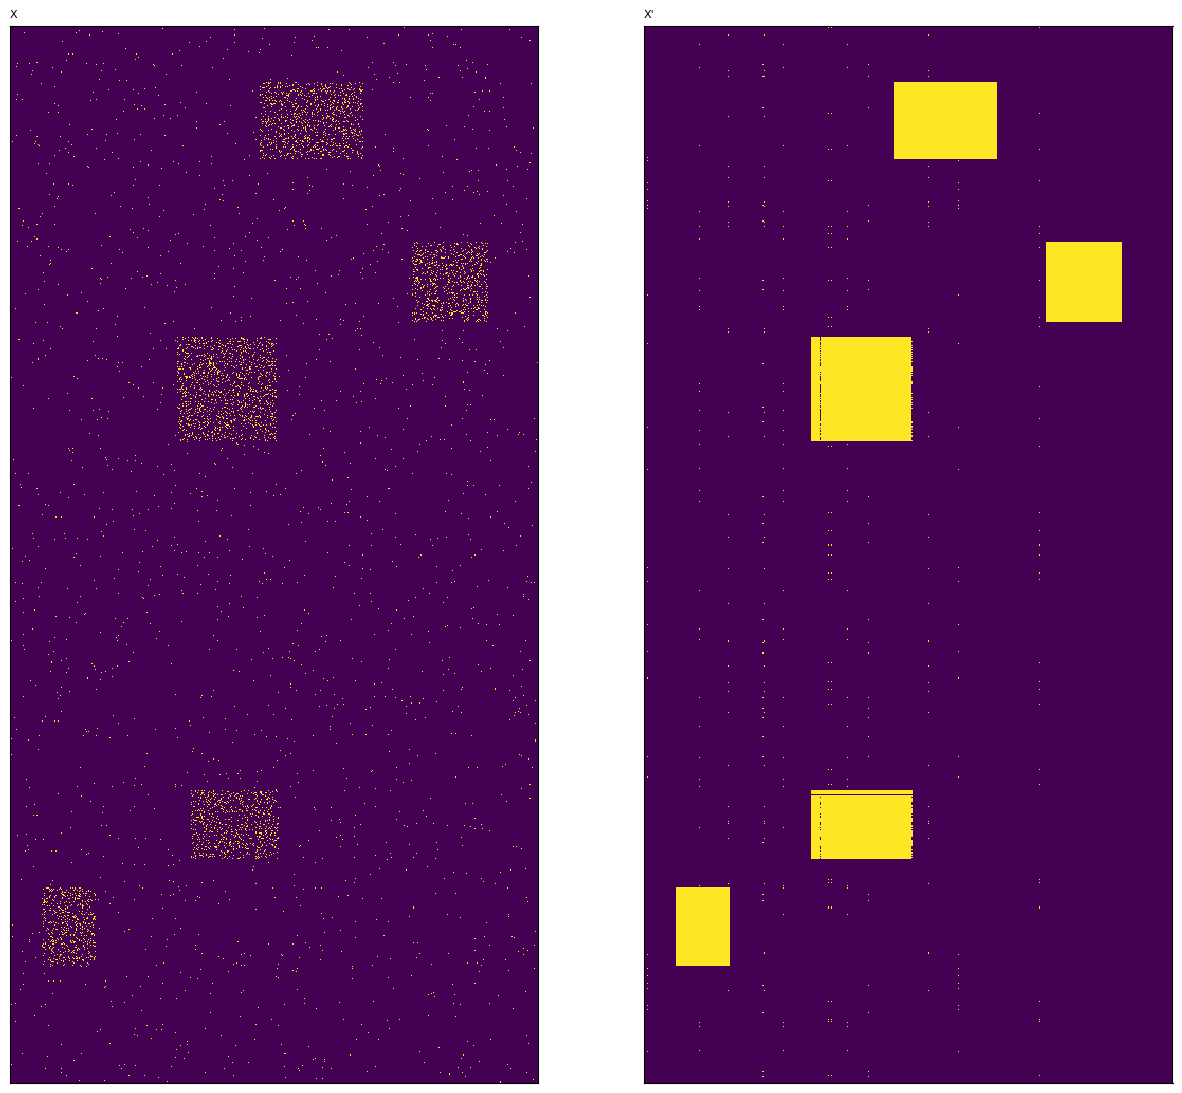

In [ ]:
from utils import matmul, to_dense, show_matrix
settings = [(to_dense(X_test), [0, 0], 'X'), 
            (matmul(asso.U, asso.V.T, sparse=False, boolean=True), [0, 1], "X'")]
show_matrix(settings=settings)